In [28]:
import sys
import os
sys.path.insert(0, os.getcwd()+"/Utils")
import PolyTurk as pt
TRIAL_ID = 9
MASK_PATH = '/home/andrew/ImageSegmentation/Training/Trial'+str(TRIAL_ID)+'/masks/'
IMG_PATH = '/home/andrew/ImageSegmentation/Training/Raw_Images_1024/'

trial_inputs = {
    'TRIAL_ID': TRIAL_ID,
    'MASK_PATH': MASK_PATH,
    'IMG_PATH': IMG_PATH
}

## Initialize Turk object

In [29]:
turk = pt.Turk(trial_inputs)

Number of HITs: 238
Reviewable Assignments: 1


In [30]:
trial_data = turk.getTaskData()

## Preview Results

In [31]:
import pandas as pd
from IPython.display import HTML
from PIL import Image
from io import BytesIO
import base64

pd.set_option('display.max_colwidth', -1)

def get_thumbnail(paths):
    bg = Image.open(paths[0])
    rgbimg = Image.new("RGBA", bg.size)
    rgbimg.paste(bg)
    fg = Image.open(paths[1])
    rgbimg.paste(fg, (0, 0), fg)
    rgbimg.thumbnail((150, 150), Image.LANCZOS)
    return rgbimg

def image_base64(im):
    if isinstance(im, str):
        im = get_thumbnail(im)
    with BytesIO() as buffer:
        im.save(buffer, 'png')
        return base64.b64encode(buffer.getvalue()).decode()

def image_formatter(im):
    return f'<img src="data:image/jpeg;base64,{image_base64(im)}">'

df = pd.DataFrame(trial_data)
df = df.drop(columns=['Answer'], axis=1)


#qgrid_widget = qgrid.show_grid(df.groupby('Worker'), show_toolbar=True)
#qgrid_widget
dfworker = df.groupby(['Worker','AssignmentID'])
dfworker.first()

import qgrid
qgrid_widget=qgrid.show_grid(dfworker.first(),show_toolbar=True)
qgrid_widget

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [32]:
dfworker['AssignmentID'].first()

Worker          AssignmentID                  
A234WZ4KX8IW07  3MAOD8E57QAX2T7C89R39WP5CZHXNG    3MAOD8E57QAX2T7C89R39WP5CZHXNG
Name: AssignmentID, dtype: object

,Worker,Preview,Score,Approved
0,A234WZ4KX8IW07,,10,False

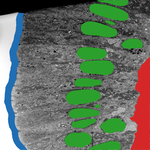

In [33]:
import pandas as pd
df = pd.DataFrame(trial_data)
df['URLs'] = df[['Image_Path', 'Mask_Path']].values.tolist()
df['Preview'] = df.URLs.map(lambda f: get_thumbnail(f))
#df.sort_values(by=['Worker'])
#df.pivot(index='Worker', columns='Image_ID', values='Avg_Poly_Verts')
HTML(df[['Worker', 'Preview','Score','Approved']].to_html(formatters={'Preview': image_formatter}, escape=False))
#df

In [34]:
df

Answer  \
0  [{'label': 'Microvilli', 'vertices': [{'x': 164, 'y': 88}, {'x': 124, 'y': 87}, {'x': 119, 'y': 98}, {'x': 112, 'y': 114}, {'x': 108, 'y': 133}, {'x': 110, 'y': 148}, {'x': 110, 'y': 174}, {'x': 108, 'y': 189}, {'x': 108, 'y': 201}, {'x': 107, 'y': 210}, {'x': 102, 'y': 228}, {'x': 97, 'y': 240}, {'x': 94, 'y': 259}, {'x': 92, 'y': 273}, {'x': 84, 'y': 292}, {'x': 79, 'y': 308}, {'x': 73, 'y': 325}, {'x': 66, 'y': 341}, {'x': 64, 'y': 352}, {'x': 64, 'y': 366}, {'x': 66, 'y': 377}, {'x': 68, 'y': 396}, {'x': 70, 'y': 408}, {'x': 70, 'y': 415}, {'x': 77, 'y': 423}, {'x': 78, 'y': 431}, {'x': 78, 'y': 440}, {'x': 74, 'y': 451}, {'x': 71, 'y': 464}, {'x': 71, 'y': 475}, {'x': 68, 'y': 485}, {'x': 65, 'y': 496}, {'x': 62, 'y': 512}, {'x': 63, 'y': 523}, {'x': 60, 'y': 539}, {'x': 58, 'y': 551}, {'x': 55, 'y': 561}, {'x': 48, 'y': 573}, {'x': 42, 'y': 583}, {'x': 36, 'y': 597}, {'x': 36, 'y': 608}, {'x': 32, 'y': 638}, {'x': 31, 'y': 656}, {'x': 30, 'y': 678}, {'x': 27, 'y': 693}, {'x': 30, 'y': 706}, {'x': 36, 'y': 717}, {'x': 39, 'y': 732}, {'x': 43, 'y': 745}, {'x': 48, 'y': 760}, {'x': 52, 'y': 768}, {'x': 56, 'y': 780}, {'x': 56, 'y': 791}, {'x': 54, 'y': 809}, {'x': 54, 'y': 821}, {'x': 55, 'y': 834}, {'x': 58, 'y': 849}, {'x': 62, 'y': 868}, {'x': 71, 'y': 881}, {'x': 77, 'y': 894}, {'x': 80, 'y': 904}, {'x': 80, 'y': 915}, {'x': 83, 'y': 938}, {'x': 87, 'y': 952}, {'x': 92, 'y': 968}, {'x': 99, 'y': 980}, {'x': 111, 'y': 998}, {'x': 122, 'y': 1009}, {'x': 131, 'y': 1017}, {'x': 139, 'y': 1023}, {'x': 188, 'y': 1023}, {'x': 169, 'y': 1000}, {'x': 144, 'y': 971}, {'x': 138, 'y': 964}, {'x': 130, 'y': 947}, {'x': 124, 'y': 922}, {'x': 123, 'y': 901}, {'x': 125, 'y': 891}, {'x': 115, 'y': 879}, {'x': 108, 'y': 866}, {'x': 103, 'y': 850}, {'x': 100, 'y': 832}, {'x': 100, 'y': 820}, {'x': 103, 'y': 797}, {'x': 99, 'y': 775}, {'x': 95, 'y': 764}, {'x': 88, 'y': 745}, {'x': 83, 'y': 732}, {'x': 79, 'y': 718}, {'x': 77, 'y': 702}, {'x': 77, 'y': 688}, {'x': 75, 'y': 663}, {'x': 75, 'y': 653}, {'x': 77, 'y': 632}, {'x': 84, 'y': 606}, {'x': 90, 'y': 590}, {'x': 99, 'y': 570}, {'x': 106, 'y': 552}, {'x': 111, 'y': 539}, {'x': 114, 'y': 515}, ...]}, {'label': 'Nucleus', 'vertices': [{'x': 875, 'y': 0}, {'x': 876, 'y': 5}, {'x': 876, 'y': 14}, {'x': 873, 'y': 22}, {'x': 868, 'y': 30}, {'x': 856, 'y': 37}, {'x': 842, 'y': 41}, {'x': 823, 'y': 42}, {'x': 806, 'y': 40}, {'x': 793, 'y': 38}, {'x': 767, 'y': 30}, {'x': 750, 'y': 25}, {'x': 720, 'y': 19}, {'x': 688, 'y': 14}, {'x': 670, 'y': 10}, {'x': 660, 'y': 7}, {'x': 665, 'y': 3}, {'x': 671, 'y': 1}]}, {'label': 'Nucleus', 'vertices': [{'x': 670, 'y': 25}, {'x': 690, 'y': 28}, {'x': 709, 'y': 30}, {'x': 727, 'y': 33}, {'x': 741, 'y': 36}, {'x': 758, 'y': 41}, {'x': 775, 'y': 45}, {'x': 791, 'y': 51}, {'x': 813, 'y': 58}, {'x': 832, 'y': 66}, {'x': 850, 'y': 76}, {'x': 862, 'y': 85}, {'x': 873, 'y': 96}, {'x': 877, 'y': 107}, {'x': 877, 'y': 115}, {'x': 875, 'y': 123}, {'x': 869, 'y': 132}, {'x': 858, 'y': 139}, {'x': 845, 'y': 141}, {'x': 830, 'y': 142}, {'x': 815, 'y': 141}, {'x': 796, 'y': 138}, {'x': 780, 'y': 135}, {'x': 753, 'y': 128}, {'x': 729, 'y': 122}, {'x': 706, 'y': 115}, {'x': 679, 'y': 107}, {'x': 656, 'y': 98}, {'x': 630, 'y': 87}, {'x': 617, 'y': 79}, {'x': 610, 'y': 68}, {'x': 608, 'y': 56}, {'x': 608, 'y': 48}, {'x': 613, 'y': 39}, {'x': 619, 'y': 33}, {'x': 630, 'y': 28}, {'x': 643, 'y': 25}, {'x': 656, 'y': 24}]}, {'label': 'Nucleus', 'vertices': [{'x': 720, 'y': 138}, {'x': 727, 'y': 137}, {'x': 736, 'y': 137}, {'x': 747, 'y': 139}, {'x': 761, 'y': 145}, {'x': 770, 'y': 149}, {'x': 778, 'y': 153}, {'x': 783, 'y': 158}, {'x': 787, 'y': 161}, {'x': 787, 'y': 165}, {'x': 783, 'y': 169}, {'x': 778, 'y': 171}, {'x': 768, 'y': 170}, {'x': 759, 'y': 169}, {'x': 746, 'y': 165}, {'x': 732, 'y': 158}, {'x': 725, 'y': 155}, {'x': 720, 'y': 150}, {'x': 717, 'y': 147}, {'x': 717, 'y': 143}]}, {'label': 'Nucleus', 'vertices': [{'x': 585, 'y': 151}, {'x': 594, 'y': 147